<a href="https://colab.research.google.com/github/votamvan/project3/blob/master/ML_Project3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS582 Machine Learning - Project 3
Professor: Mohamed Abdelrazik

Team:
*   Tam Van Vo - 610746
*   Quynh Pham - 610716
*   Samsher Bahadur Rana - 611060
*   Van Vong Tran - 610772
*   Yared Geberetsadik Beyene - 110466

Project Colab URL: 

https://colab.research.google.com/drive/1v7P08rPrXz4ho4X05Tg3o4vBMDchHjOf

Dataset were manually made by team's members: 

https://github.com/votamvan/project3/tree/master/data

Ref:

https://colab.research.google.com/drive/1Mh2HP_Mfxoao6qNFbhfV3u28tG8jAVGk#scrollTo=rBPEqumuZ0aG


# Main idea

The global shoe (footwear) industry is a multi-billion dollar market where each year. The United States contributes a substantial amount of revenues. Last year, Americans contributed more than 50% of a $180 billion worldwide market of shoe manufacturers, retailers, and distributors.

Today, many people use social media to post about what they are wearing, and in them thousands of comments are asking the same questions about where to purchase the same beautiful pieces of fashion items. 

In one [study](https://www.visenze.com/blog/visenze-participates-in-communicasia-2015-conducts-the-dress-challenge-experiment), 96.6% of users lose their patience after 1 min and 30 seconds when using available methods such as guessing at fashion items with keywords on e-commerce marketplace sites. and abandons the search quest altogether without any results.

This results in loss of conversion, the point at which a recipient of a marketing message on social media performs a desired action i.e purchasing a product. Companies can use Deep learning to streamline the process of seeing the product to finding it online at their stores.





# Technology stack
YOLOv3 is the latest variant of the popular YOLO – You Only Look Once object detection algorithm. The object detection task is to determine the location of the image where certain objects are present, and to classify those objects as well. 

Previous methods for this, such as R-CNN and its variations, used a pipeline to perform multiple steps of this task. This can be slow to run and also difficult to optimize, since each individual component needs to be trained separately.

# Pre-works

In [0]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

Using TensorFlow backend.


In [0]:
!git clone https://github.com/votamvan/project3.git

Cloning into 'project3'...
remote: Enumerating objects: 2558, done.
remote: Counting objects: 100% (2558/2558), done.
remote: Compressing objects: 100% (1676/1676), done.
remote: Total 2558 (delta 631), reused 2378 (delta 471), pack-reused 0
Receiving objects: 100% (2558/2558), 45.50 MiB | 9.90 MiB/s, done.
Resolving deltas: 100% (631/631), done.


In [0]:
imgs_path = "project3/data/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5

In [0]:
filelist = []
for root, dirs, files in os.walk(imgs_path):
	for file in files:
		if(file.endswith(".jpg") | file.endswith(".JPG")):
			filelist.append(os.path.join(root,file))

# Part1: YOLOv3 Experience 

## Cloning and Building Darknet

In [0]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [0]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [0]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
!make

In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

## Download pretrained YOLOv3 weights
YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3 on these pretrained classes and get detections.

In [0]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-05-14 04:14:49--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   431KB/s    in 15m 3s  

2020-05-14 04:29:54 (268 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



## Run Detections with Darknet and YOLOv3!
Darknet is now built and ready to run detections using YOLOv3 in the cloud!

Here are the classes:
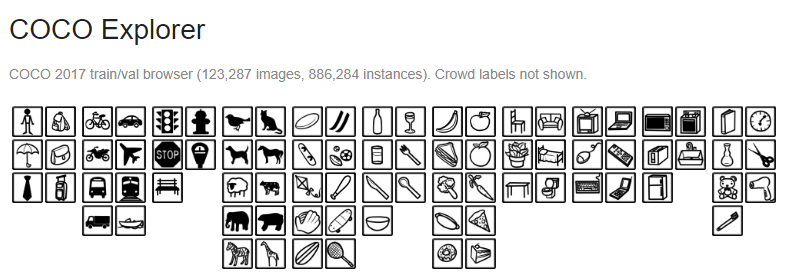

## Default sample

In [0]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

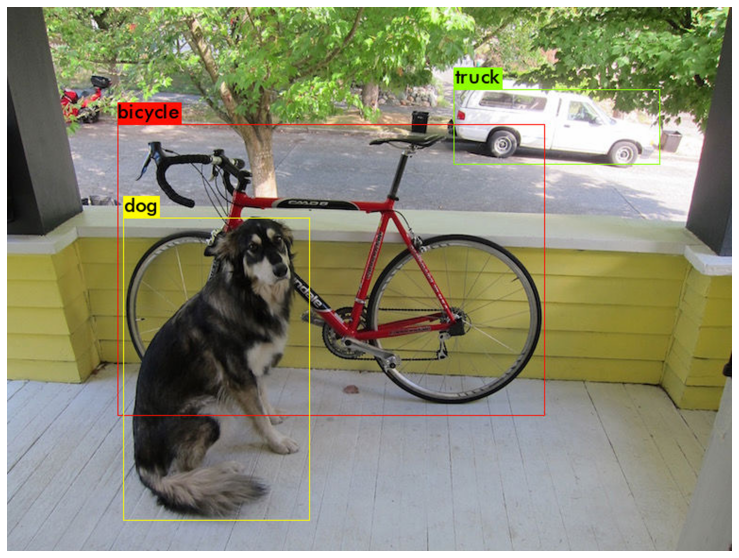

In [0]:
imShow('predictions.jpg')

The result looks good with it's testing image. Let's try to use one of our picture to see if it can detect. Shoes are not included in the pre-train model.

## Shoes sample

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

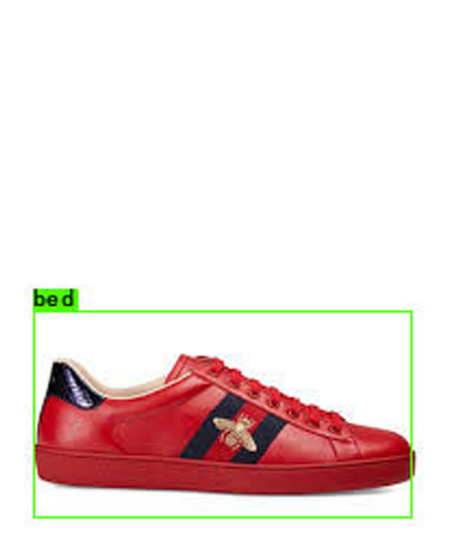

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/project3/data/sneaker/sneakers-010.jpg
imShow('predictions.jpg')

So we can see that the pretrained YOLO model can't detect shoes object.

# Part2: Training a Custom YOLOv3 Object Detector

In order to create a custom YOLOv3 detector we will need the following:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
# *   train.txt and test.txt


#Step1: Data Preparation: 
Everyone in the team prepares training data by ourselves. Each of us collect 100 images of each shoes category and then create an annotation file for each image. We have 6 types of shoes in total: **sandals, sneakers, boots, heels, loafers and slippers**

**Collect the images:**

* Crawl image by tool
* Download image manually 

**Annotation images:** https://github.com/tzutalin/labelImg

## All shoes categories



In [0]:
subdirs = pd.read_csv('project3/data/classes.txt', header = None)
print(subdirs)

         0
0     heel
1  slipper
2  sneaker
3   sandal
4   loafer
5     boot


Checking valid image format

In [0]:
for subdir in subdirs[0]:
  c_files = []
  for root, dirs, files in os.walk(imgs_path+subdir):
    for file in files:
      if(file.endswith(".jpg") | file.endswith(".JPG")):
        c_files.append(os.path.join(root,file))
  print("number of images for "+subdir + " is ",len(c_files))

number of images for heel is  94
number of images for slipper is  100
number of images for sneaker is  99
number of images for sandal is  100
number of images for loafer is  100
number of images for boot is  88


In [0]:
print("number of images:",len(filelist))

number of images: 589


In [0]:
def view_images(name, columns, rows):
  import numpy as np
  import matplotlib.pyplot as plt
  w=100
  h=100
  fig=plt.figure(figsize=(10, 10))
  columns = 4
  rows = 5
  count = 0;
  for file in filelist:
    if(name in str(file)):
      count+=1
      original = load_img(file)
      fig.add_subplot(rows, columns, count)
      plt.imshow(original)
    if (count == columns*rows): break
  plt.show()

## Sneakers

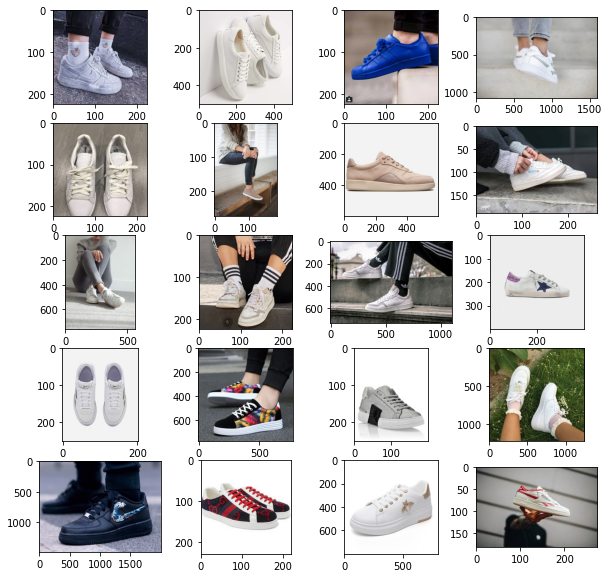

In [0]:
view_images("sneaker", 5, 4)

This data was collected manually by searching keyword "sneakers" on google. Images were selected in different colors, styles, metarials, different angles and with person who wear the shoes

## Loafers

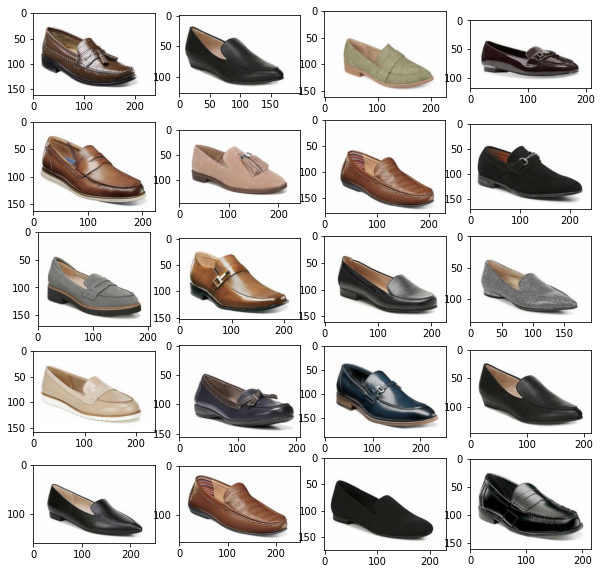

In [0]:
view_images("loafer-0", 5, 4)

This data was collected manually by searching keyword "loafers" on google. Images were selected in similar size and angles. Some are duplicate

## Sandals

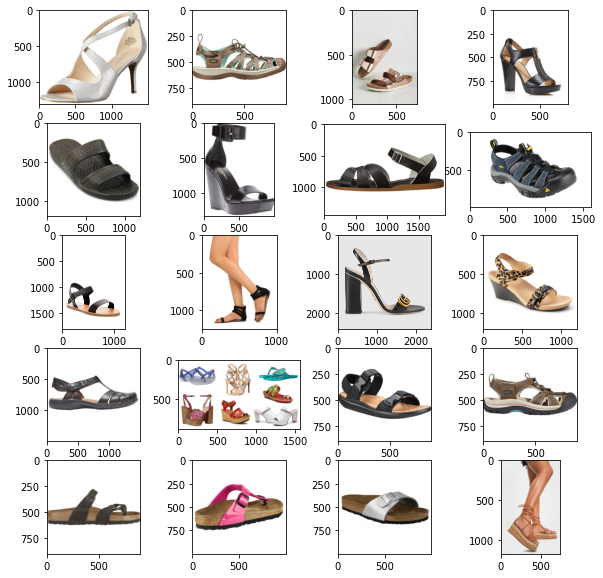

In [0]:
view_images("sandal-0", 5, 4)

This dataset was collected by using tool to crawl images automatically on google search. We can see some pictures are not sandals.

## Heels

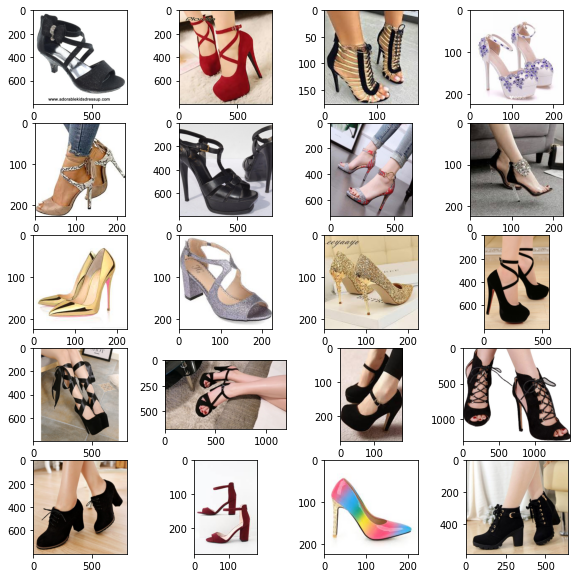

In [0]:
view_images("heel-0", 5, 4)

This dataset was collect automatically by using plugin of chrome for getting images from google for keyword "heels". They looks pretty good for automatically search

## Slippers

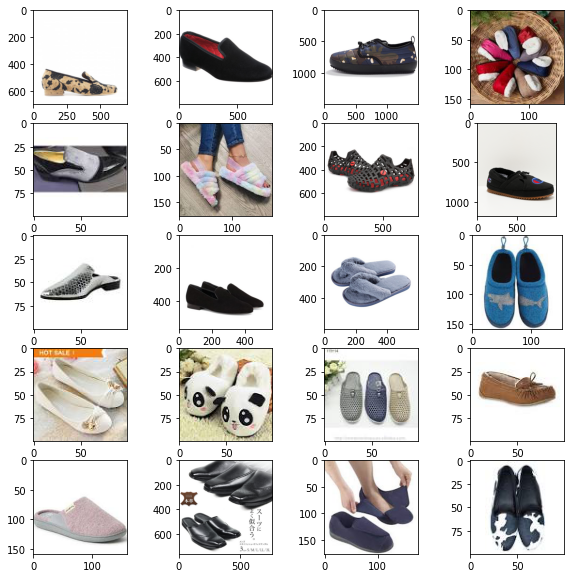

In [0]:
view_images("slipper-0", 5, 4)

This dataset was collect automatically by using plugin of chrome for getting images from google for keyword "slippers". They looks pretty good for automatically search

## Boots

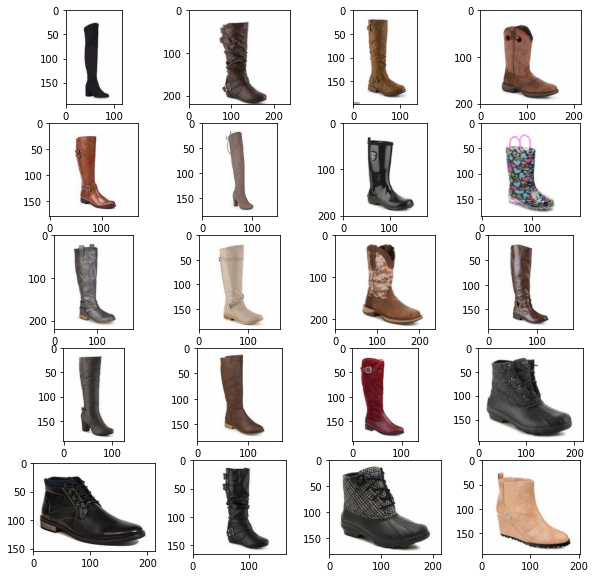

In [0]:
view_images("boot-0", 5, 4)

This data was collected manually by searching keyword "loafers" on google. Images were selected in similar size and angles. Some are duplicate

## TSNEViewer - VGG-16

This app embeds a set of image files in 2d using using the t-SNE dimensionality reduction technique, placing images of similar content near each other

# make feature_extractor
    model = keras.applications.VGG16(weights='vgg16_weights_tf_dim_ordering_tf_kernels.h5', include_top=True)
    feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)



Fully-Connected Layers. VGG has three fully-connected layers: the first two have 4096 channels each and the third has 1000 channels, 1 for each class.

https://ml4a.github.io/guides/ImageTSNEViewer/

https://github.com/ml4a/ml4a-guides/blob/master/notebooks/image-tsne.ipynb

**Result:**

https://raw.githubusercontent.com/votamvan/project3/master/shoes-tSNE.png

In [0]:
%matplotlib inline
import json
from PIL import Image
import matplotlib
from matplotlib.pyplot import imshow

fname = "/Users/andy/Downloads/shoes-tSNE.json"
data_json = []
with open(fname) as tse_file:
    data_json = json.load(tse_file)

images, tx, ty = [], [], []
for item in data_json:
    images.append(item["path"])
    tx.append(item["point"][0])
    ty.append(item["point"][1])
print("===== len =====", len(images))

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for i, img in enumerate(images):
    x, y = tx[i], ty[i]
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

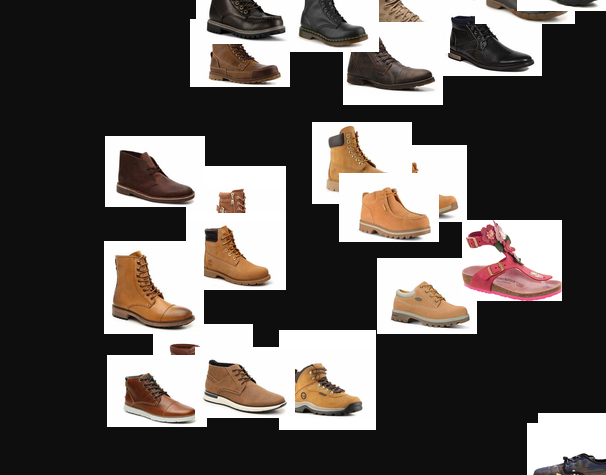

We can see that a sandal is pulled next to the boots because of the similar shapes

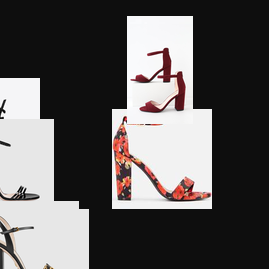

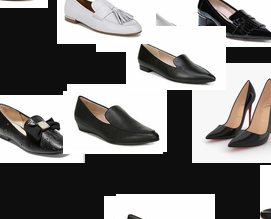

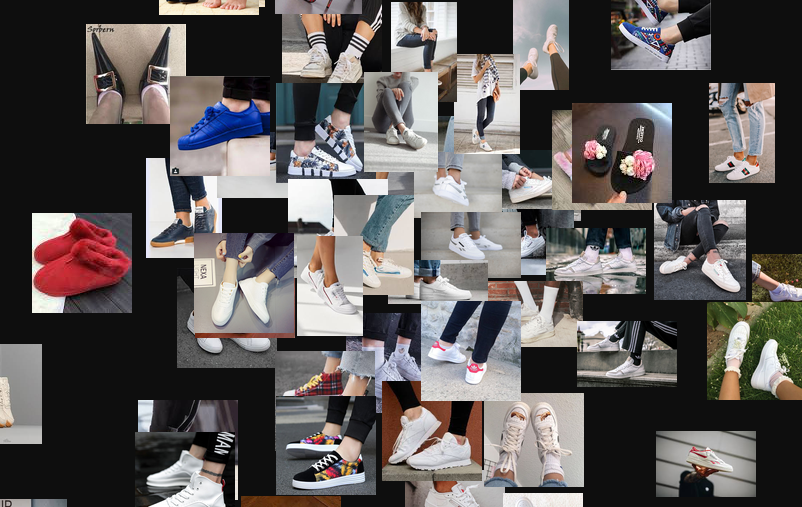

#Step 2: Custom .cfg file for re-train Yolov3 model

**shoes_all_yolov3_tiny.cfg**

https://github.com/votamvan/project3/blob/master/python-src/app/training/shoes_all_yolov3_tiny.cfg



## Turning Parameters


*   batch=24, use 24 images for every training step
*   subdivisions = 8, mini batch size
*   filters = 33, (classes + 5)*3
*   classes = 6, number of classes to classify



## Data Augmentation parameter


*   angle = 0, random rotate images
*   saturation = 1.5, color attribute
*   exposure = 1.5, color attribute
*   hue = .1, color attribute



## Model Architecture

* 106 layers
* input size is 416 x 416




In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D
# from tensorflow.keras.layers.merge import add, concatenate
from tensorflow.keras.layers import add, concatenate
from tensorflow.keras.models import Model

def _conv_block(inp, convs, skip=True):
    x = inp
    count = 0
    
    for conv in convs:
        if count == (len(convs) - 2) and skip:
            skip_connection = x
        count += 1
        
        if conv['stride'] > 1: x = ZeroPadding2D(((1,0),(1,0)))(x) # peculiar padding as darknet prefer left and top
        x = Conv2D(conv['filter'], 
                   conv['kernel'], 
                   strides=conv['stride'], 
                   padding='valid' if conv['stride'] > 1 else 'same', # peculiar padding as darknet prefer left and top
                   name='conv_' + str(conv['layer_idx']), 
                   use_bias=False if conv['bnorm'] else True)(x)
        if conv['bnorm']: x = BatchNormalization(epsilon=0.001, name='bnorm_' + str(conv['layer_idx']))(x)
        if conv['leaky']: x = LeakyReLU(alpha=0.1, name='leaky_' + str(conv['layer_idx']))(x)

    return add([skip_connection, x]) if skip else x

def make_yolov3_model():
    input_image = Input(shape=(None, None, 3))

    # Layer  0 => 4
    x = _conv_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
                                  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
                                  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
                                  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])

    # Layer  5 => 8
    x = _conv_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
                        {'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])

    # Layer  9 => 11
    x = _conv_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 9},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])

    # Layer 12 => 15
    x = _conv_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
                        {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
                        {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])

    # Layer 16 => 36
    for i in range(7):
        x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
                            {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])
        
    skip_36 = x
        
    # Layer 37 => 40
    x = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])

    # Layer 41 => 61
    for i in range(7):
        x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
                            {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])
        
    skip_61 = x
        
    # Layer 62 => 65
    x = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])

    # Layer 66 => 74
    for i in range(3):
        x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
                            {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])
        
    # Layer 75 => 79
    x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], skip=False)

    # Layer 80 => 82
    yolo_82 = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
                              {'filter':  255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], skip=False)

    # Layer 83 => 86
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_61])

    # Layer 87 => 91
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], skip=False)

    # Layer 92 => 94
    yolo_94 = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
                              {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], skip=False)

    # Layer 95 => 98
    x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_36])

    # Layer 99 => 106
    yolo_106 = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
                               {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], skip=False)

    model = Model(input_image, [yolo_82, yolo_94, yolo_106])    
    return model

yolov3 = make_yolov3_model()
dot_img_file = 'yolov3_model.png'
tf.keras.utils.plot_model(yolov3, to_file=dot_img_file, show_shapes=True)

# Step 3: obj.data and obj.names files

**shoes_all.data**
```
classes= 6
train  = /content/shoes_train.txt  
valid  = /content/shoes_test.txt  
names = /content/shoes_all.names  
backup = backup/
```

**shoes_all.names**
```
heel
slipper
sneaker
sandal
loafer
boot
```




# Step 4: train.txt and test.txt

90% images are for training and 10% for testing

# Step 5: shoes.conv.74 for the convolutional layers.
Use the pre-trained weights for the convolutional layers of the YOLOv3 network

# Step 6: Training

In [0]:
!./darknet detector train /content/shoes_all.data /content/shoes_all_yolov3.cfg /content/shoes.conv.74 -map -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Short

# Step7: Learning Chart

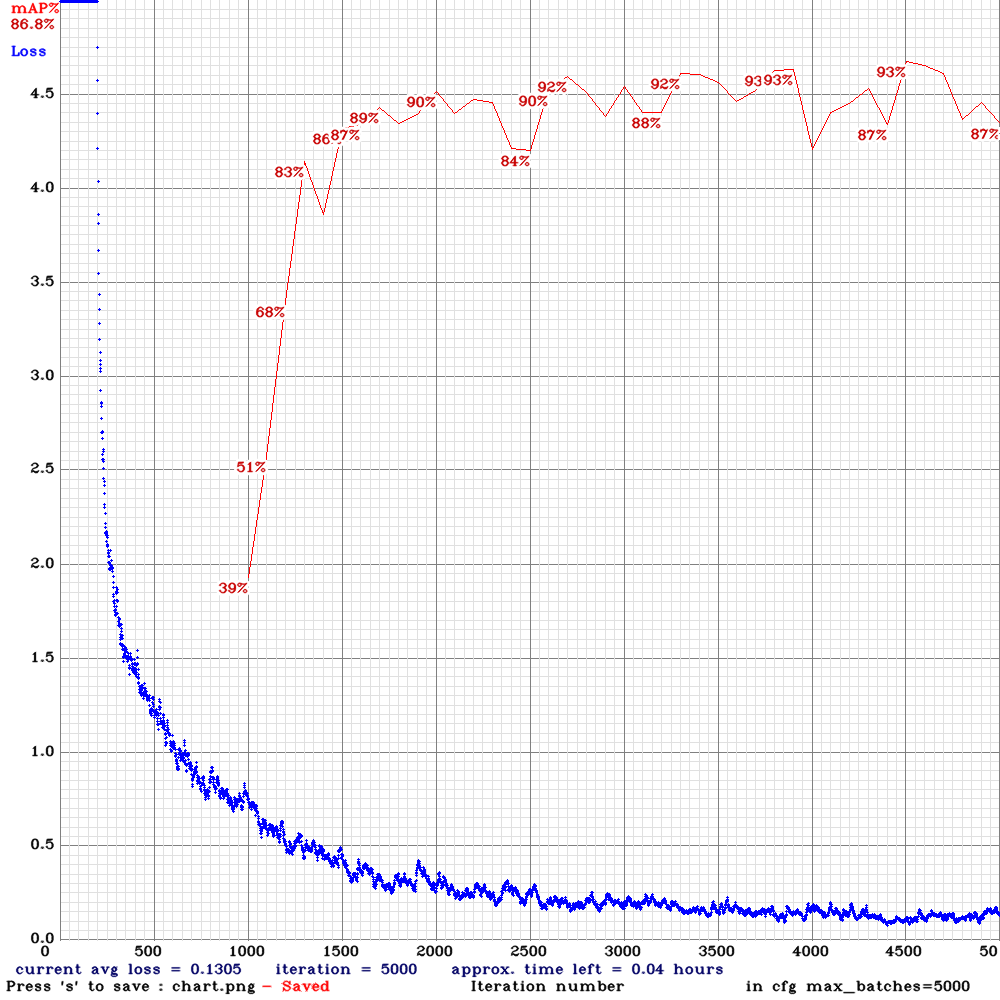

#Part 3: CAM

To help deep learning practitioners visually debug their models and properly understand where it’s “looking” in an image, Selvaraju et al. created Gradient-weighted Class Activation Mapping, or more simply, Grad-CAM

https://www.pyimagesearch.com/2020/03/09/grad-cam-visualize-class-activation-maps-with-keras-tensorflow-and-deep-learning/

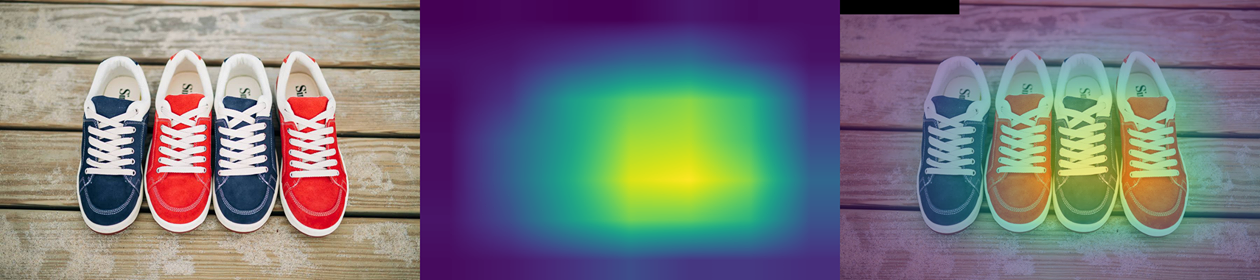

# Part 4: API and UI

**Shoes detection API:**

VM - EC2 instance - 4cpu and 16 GB

Dockerfile:

```
FROM python:3.7

COPY ./requirements.txt /app/requirements.txt
WORKDIR /app
RUN pip install -r requirements.txt
ENTRYPOINT [ "python" ]
CMD [ "app/main.py" ]
```

http://ec2-3-23-154-60.us-east-2.compute.amazonaws.com:5000/

**UI Webapp:**

Dockerfile:

```
# base image
FROM node:12.2.0-alpine

# set working directory
WORKDIR /app

# add `/app/node_modules/.bin` to $PATH
ENV PATH /app/node_modules/.bin:$PATH

# install and cache app dependencies
COPY package.json /app/package.json
RUN npm install
RUN npm install @vue/cli@3.7.0 -g

# start app
CMD ["npm", "run", "serve"]
```

http://3.23.154.60:8081/

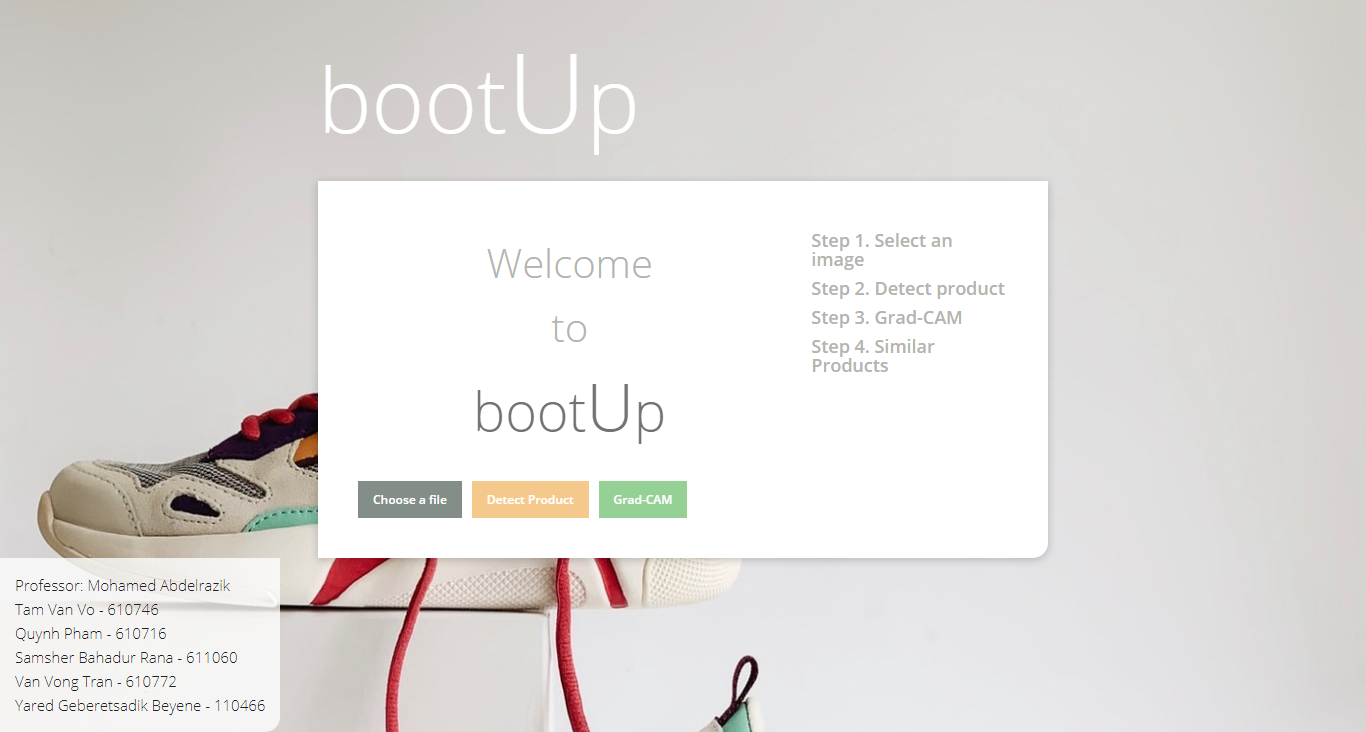

## Find a picture from social media

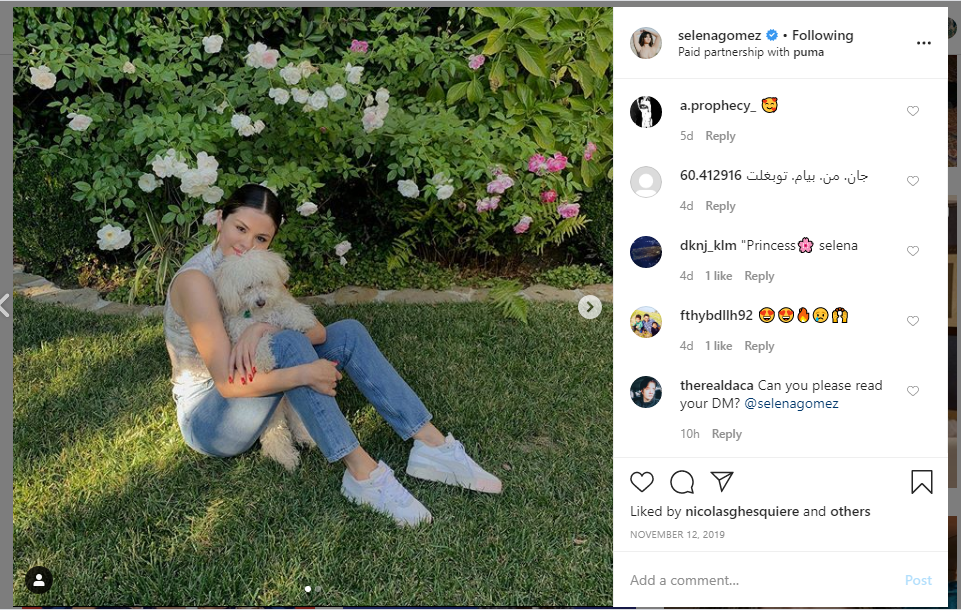

## Let's find what she is wearing

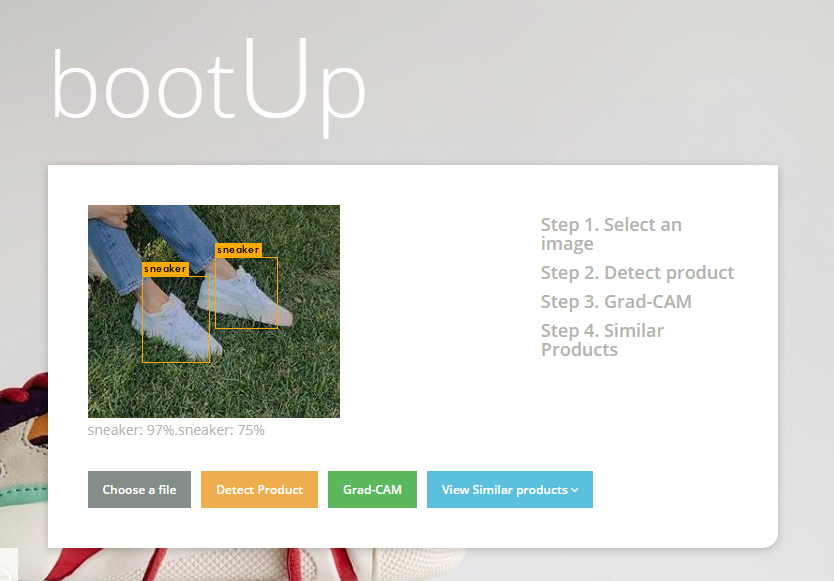

## On going feature - Recommendation products

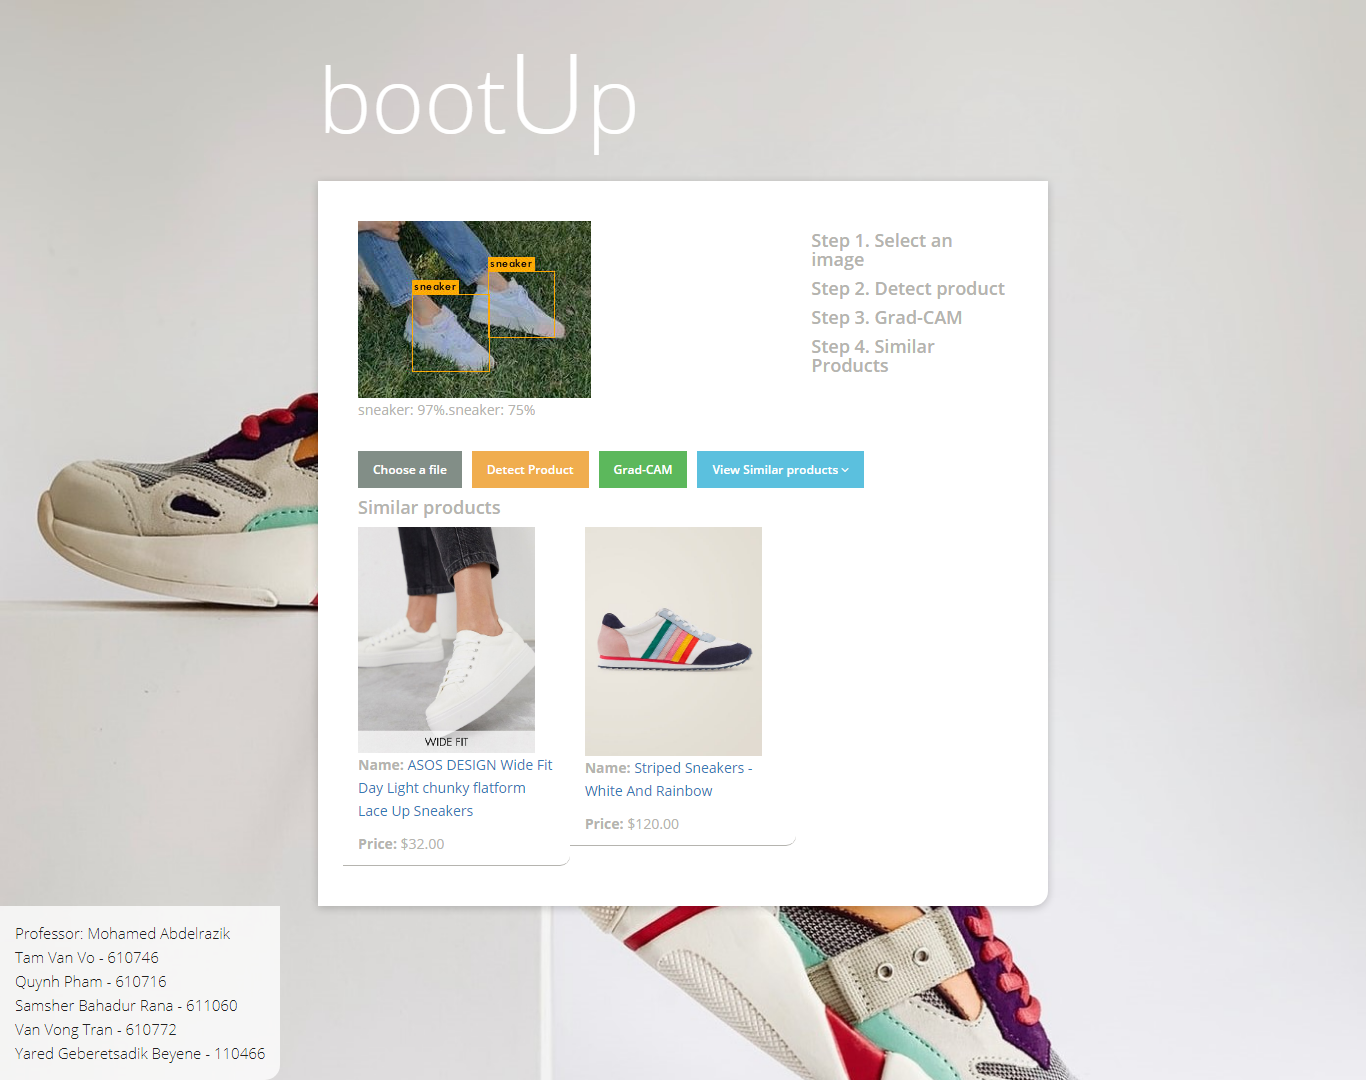